# Branching processes live demo 

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom

In [34]:
def n_children_poisson(R0, n_draws):
    draws = np.random.poisson(R0, size=n_draws) 
    total_children = np.sum(draws)
    return total_children 


In [44]:
def n_children_negative_binomial(R0, n_draws, k):
    mean = R0
    variance = mean + (mean**2)/k
    p = mean/variance
    n = mean**2 / (variance - mean)
    draw = nbinom.rvs(n=n,p=p)
    draws = nbinom.rvs(n=n,p=p,size=10)
    total_children = np.sum(draws) 
    return total_children 


In [45]:
def single_branching_process_poisson(children_function, R0, n_generations):
    '''
    Given a fxn for the number of progeny and R0 and a fixed number of generations, return the number of infections in each generation, z 
    '''
    z = np.zeros(n_generations, dtype=int) 
    z[0] = 1 
    for generation in np.arange(1, n_generations): 
        z[generation] = children_function(R0, z[generation-1]) # number of draws is the number of people in the previous generation
    return z
                                
        

In [46]:
def single_branching_process_NB(children_function, R0, n_generations, k):
    '''
    Given a fxn for the number of progeny and R0 and a fixed number of generations, return the number of infections in each generation, z 
    '''
    z = np.zeros(n_generations, dtype=int) 
    z[0] = 1 
    for generation in np.arange(1, n_generations): 
        z[generation] = children_function(R0, z[generation-1], k) # number of draws is the number of people in the previous generation
    return z

In [79]:
trajectory_poisson = single_branching_process_poisson(n_children_poisson, 3, 10) 

trajectory_NB = single_branching_process_NB(n_children_negative_binomial, 3, 10, 0.1) 

print(f' Poisson: {trajectory}')
print(f' NB: {trajectory}') 

 Poisson: [ 1 31 33 12 31 44  7 19 20 17 14  5  2  2  5]
 NB: [ 1 31 33 12 31 44  7 19 20 17 14  5  2  2  5]


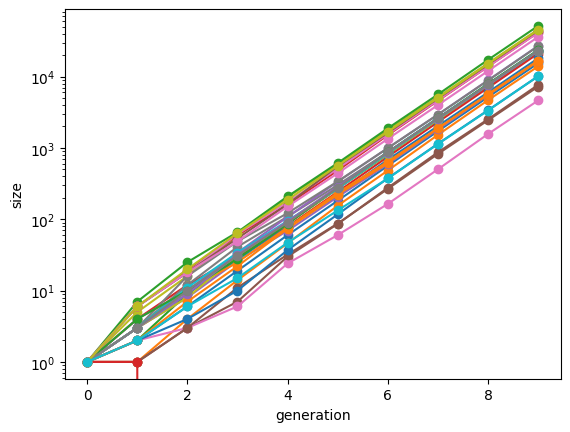

In [80]:
fig, ax = plt.subplots() 

for i in range(30):
    trajectory = single_branching_process_poisson(n_children_poisson, 3, 10) 
    
    ax.semilogy(trajectory, '-o') 
    ax.set_xlabel('generation')
    ax.set_ylabel('size')

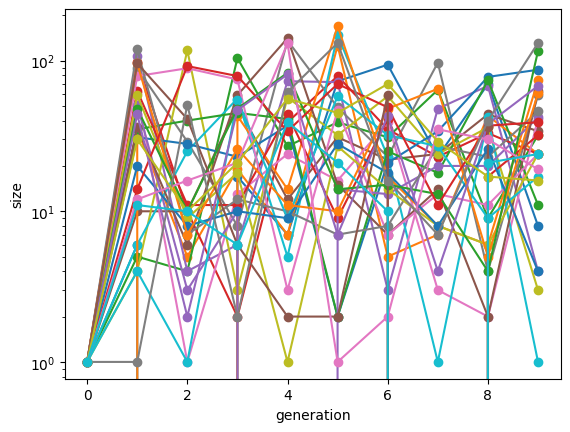

In [81]:
fig, ax = plt.subplots() 

for i in range(30):
    trajectory = single_branching_process_NB(n_children_negative_binomial, 3, 10, 0.1) 
    
    ax.semilogy(trajectory, '-o') 
    ax.set_xlabel('generation')
    ax.set_ylabel('size')

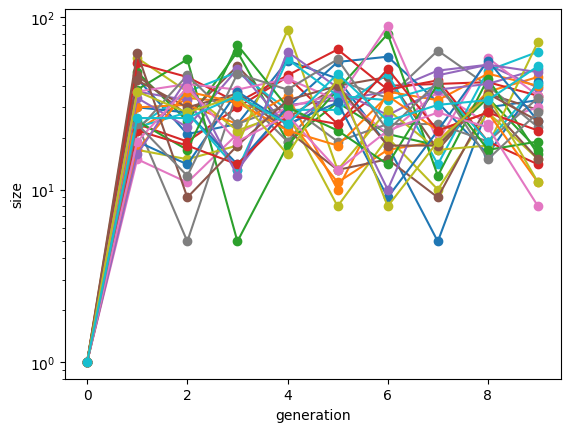

In [138]:
fig, ax = plt.subplots() 

for i in range(30):
    trajectory = single_branching_process_NB(n_children_negative_binomial, 3, 10, 0.5) 
    
    ax.semilogy(trajectory, '-o') 
    ax.set_xlabel('generation')
    ax.set_ylabel('size')

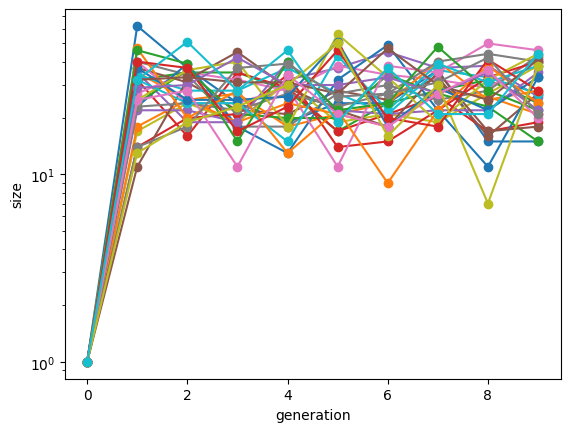

In [139]:
fig, ax = plt.subplots() 

for i in range(30):
    trajectory = single_branching_process_NB(n_children_negative_binomial, 3, 10, 1.0) 
    
    ax.semilogy(trajectory, '-o') 
    ax.set_xlabel('generation')
    ax.set_ylabel('size')

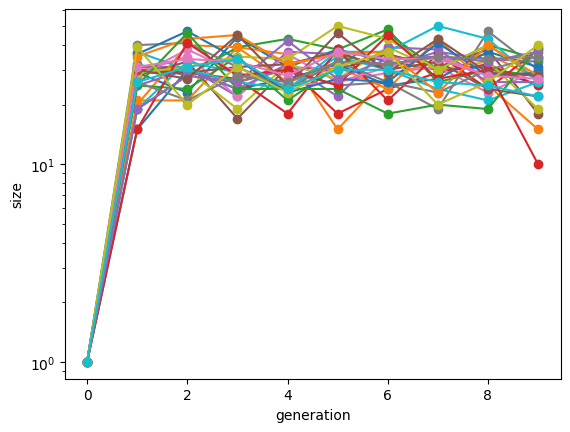

In [137]:
fig, ax = plt.subplots() 

for i in range(30):
    trajectory = single_branching_process_NB(n_children_negative_binomial, 3, 10, 5) 
    
    ax.semilogy(trajectory, '-o') 
    ax.set_xlabel('generation')
    ax.set_ylabel('size')

Do this 100K times and then count the number of times that end in a fininte number of generations / total number of times 

Expecting more dispersion (more superspreading potential) - probability that branching process dies quickly increases

In [88]:
number_of_trials = 10
number_of_generations = 10  # number of generations
R0 = 3

k_values = [0.1, 0.5, 1.0, 5.0]

def find_probability(R0, G, list_of_k_values, number_of_trials):
    zero_children_generations = np.zeros(len(list_of_k_values))
    probability_endemic_dies_out = []
    
    for k_index, k in enumerate(list_of_k_values):
        for i in range(number_of_trials):
            test = single_branching_process_NB(n_children_negative_binomial, R0, G, k)
        
        for generation in range(len(test)):
            if test[generation] == 0:
                zero_children_generations[k_index] += 1
        
        print(f'For k = {k}, the number of generations in which the branch dies out (if at all) is {zero_children_generations[k_index]}')
        
        probability_k = zero_children_generations[k_index] / number_of_trials
        probability_endemic_dies_out.append(probability_k)
    
    print(f'For all k, the probability that the endemic dies out eventually is {probability_endemic_dies_out}')

In [90]:
ten_trials = find_probability(R0, number_of_generations, k_values, number_of_trials) 
print(ten_trials) 

For k = 0.1, the number of generations in which the branch dies out (if at all) is 0.0
For k = 0.5, the number of generations in which the branch dies out (if at all) is 0.0
For k = 1.0, the number of generations in which the branch dies out (if at all) is 0.0
For k = 5.0, the number of generations in which the branch dies out (if at all) is 0.0
For all k, the probability that the endemic dies out eventually is [0.0, 0.0, 0.0, 0.0]
None


In [123]:
number_of_trials = 100000
number_of_generations = 10  
R0 = 3


def find_probability(R0, G, k, number_of_trials):
    zero_children_generations = 0
    list_of_outbreaks = []
    for i in range(number_of_trials):
        outbreak = single_branching_process_NB(n_children_negative_binomial, R0, G, k)
        list_of_outbreaks.append(outbreak)  
        
        for generation in range(len(outbreak)):
            if outbreak[generation] == 0:
                zero_children_generations += 1
    
    probability_endemic_dies_out = zero_children_generations / number_of_trials
    
    return probability_endemic_dies_out, list_of_outbreaks


In [128]:
prob_k_01 = find_probability(R0, number_of_generations, 0.1, 100000) 
probability_k_01 = prob_k_01[0]
list_of_outbreaks = prob_k_01[1]

print(f'(The probability of an endemic dying out eventually when k=0.1 is {probability_k_01}')

(The probability of an endemic dying out eventually when k=0.1 is 0.28986


In [129]:
prob_k_05 = find_probability(R0, number_of_generations, 0.5, 100000) 
probability_k_05 = prob_k_05[0]
list_of_outbreaks_k_05 = prob_k_05[1]

print(f'(The probability of an endemic dying out eventually when k=0.1 is {probability_k_05}')

(The probability of an endemic dying out eventually when k=0.1 is 0.00049


In [134]:
prob_k_1 = find_probability(R0, number_of_generations, 1.0, number_of_trials) 
probability_k_1 = prob_k_1[0]
list_of_outbreaks_k_1 = prob_k_1[1]

print(f'(The probability of an endemic dying out eventually when k=1.0 is {probability_k_1}')

(The probability of an endemic dying out eventually when k=1.0 is 1e-05


In [135]:
prob_k_5 = find_probability(R0, number_of_generations, 5.0, number_of_trials) 
probability_k_5 = prob_k_5[0]
list_of_outbreaks_k_5 = prob_k_5[1]

print(f'(The probability of an endemic dying out eventually when k=5.0 is {probability_k_5}')

(The probability of an endemic dying out eventually when k=5.0 is 0.0


Part B: How does k affect q? Explain what this means in terms of the relationship between p (i.e., 1 − q)
and superspreading

 We see that more dispersion, indicated a larger potential for superspreading, results in a greater probabilty that the branching process dies quickly. 

Part C: How large do finite outbreaks get before they die out? For the parameters above, and for only
the finite outbreaks, plot a histogram of 100, 000 finite outbreaks for your choice or choices of
k, and R0 = 3. What do you observe?

Hint: When we estimate a probability from a stochastic process like this, a convenient way to do this is Monte Carlo: simulate,
say, 100, 000 branching processes and take note of how many cease before growing large.
3


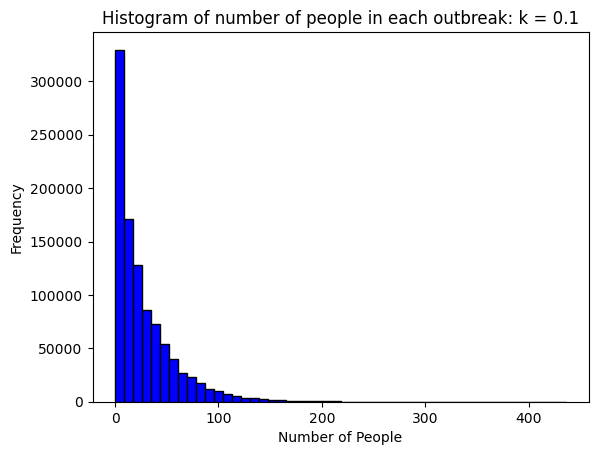

In [127]:
flattened_data = [item for sublist in list_of_outbreaks for item in sublist]

plt.hist(flattened_data, bins=50, color='blue', edgecolor='black')

plt.xlabel('Number of People')
plt.ylabel('Frequency')
plt.title('Histogram of number of people in each outbreak: k = 0.1')

plt.show()

In [148]:
# How large do ONLY FINITE outbreaks get before they die out 

def find_size_of_dying_outbreaks(R0, G, k, number_of_trials):
    zero_children_generations = 0
    list_of_outbreaks = []
    index_of_all_dying_outbreaks = []
    
    for i in range(number_of_trials):
        outbreak = single_branching_process_NB(n_children_negative_binomial, R0, G, k)
        list_of_outbreaks.append(outbreak)  
        
        for generation in range(len(outbreak)):
            if outbreak[generation] == 0:
                # zero_children_generations += 1
                # take the index from list of outbreaks
                index_of_dying_outbreak = list_of_outbreaks[i] 
                index_of_all_dying_outbreaks.append(index_of_dying_outbreak) 

    # make sublist of all dying outbreaks 
    sublist_of_all_dying_outbreaks = []
    for index in index_of_all_dying_outbreaks:
        dying_outbreak = list_of_outbreaks[index] 
        sublist_of_all_dying_outbreaks.append(dying_outbreak) 
    
    
    #find the max size of an outbreak that dies 
    max_size_dying_outbreak = []
    
    for outbreak in range(len(sublist_of_all_dying_outbreaks)):
        print(outbreak) 
        # find the max size of generation in each outbreak that will eventually die
        sorted_outbreak = outbreak.sort()
        max = sorted_outbreak[-1]
        max_size_dying_outbreak.append(max) 
            
    
    return max_size_dying_outbreak 

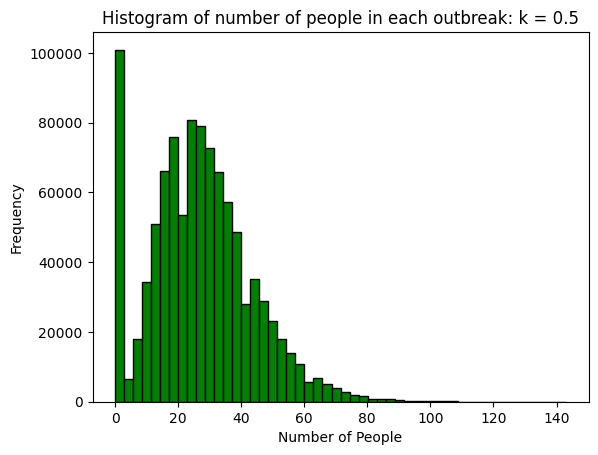

In [130]:
flattened_data = [item for sublist in list_of_outbreaks_k_05 for item in sublist]

plt.hist(flattened_data, bins=50, color='green', edgecolor='black')

plt.xlabel('Number of People')
plt.ylabel('Frequency')
plt.title('Histogram of number of people in each outbreak: k = 0.5')

plt.show()

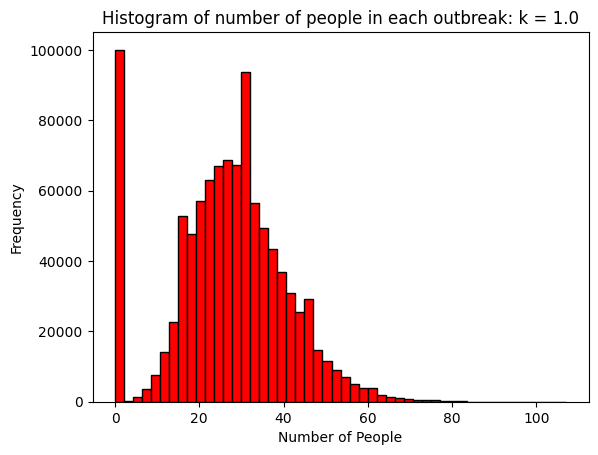

In [132]:
flattened_data = [item for sublist in list_of_outbreaks_k_1 for item in sublist]

plt.hist(flattened_data, bins=50, color='red', edgecolor='black')

plt.xlabel('Number of People')
plt.ylabel('Frequency')
plt.title('Histogram of number of people in each outbreak: k = 1.0')

plt.show()

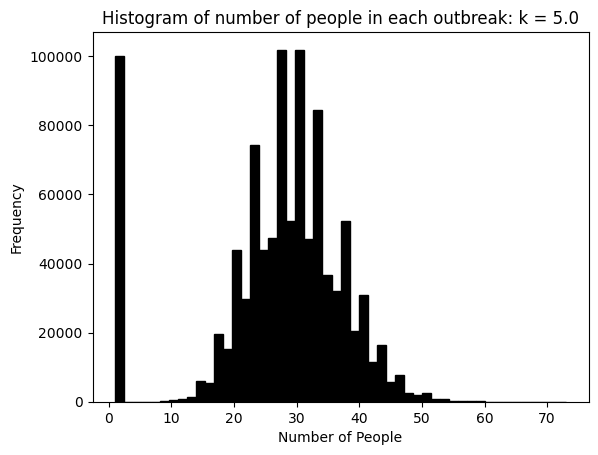

In [136]:
flattened_data = [item for sublist in list_of_outbreaks_k_5 for item in sublist]

plt.hist(flattened_data, bins=50, color='black', edgecolor='black')

plt.xlabel('Number of People')
plt.ylabel('Frequency')
plt.title('Histogram of number of people in each outbreak: k = 5.0')

plt.show()